In [1]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn import ensemble

In [12]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cntry    8147 non-null   object 
 1   idno     8147 non-null   float64
 2   year     8147 non-null   int64  
 3   tvtot    8147 non-null   float64
 4   ppltrst  8147 non-null   float64
 5   pplfair  8147 non-null   float64
 6   pplhlp   8147 non-null   float64
 7   happy    8147 non-null   float64
 8   sclmeet  8147 non-null   float64
 9   sclact   8147 non-null   float64
 10  gndr     8147 non-null   float64
 11  agea     8147 non-null   float64
 12  partner  8147 non-null   float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


In [13]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [16]:
# Define outcome and predictors.
# Set the outcomes to `0` and `1`.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]
# Make the categorical variable `country` into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)
X.head()

,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,CH,CZ,DE,ES,NO,SE
0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,True,False,False,False,False,False
1,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,True,False,False,False,False,False
2,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,True,False,False,False,False,False
3,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,True,False,False,False,False,False
4,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,True,False,False,False,False,False


In [17]:
# Define outcome and predictors.
# Set the outcomes to `0` and `1`.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]



# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 20% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [3]:
# You'll make 500 iterations, use 2-deep trees, and set your loss function.

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:280: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(


In [4]:
def plot_confusion_matrix(cm, classes,normalize,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


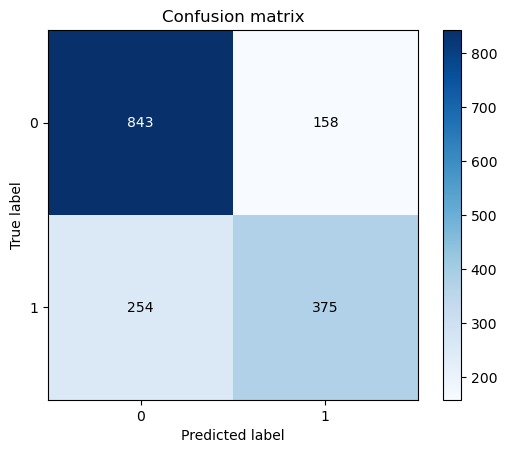

In [5]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],False)

Normalized confusion matrix


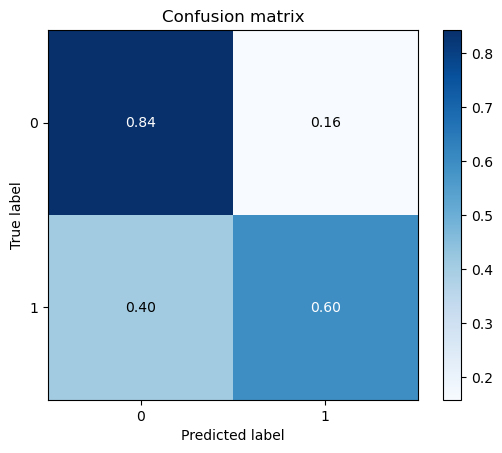

In [6]:
cm = confusion_matrix(y_test, predict_test)
plot_confusion_matrix(cm,[0,1],True)

In [10]:
#accuracy score 
print(f' accuracy score: {clf.score(X_test, y_test)}')
y_pred = clf.predict(X_test)
print(f' precesion score: {precision_score(y_test,y_pred)}')
print(f' recall score: {recall_score(y_test,y_pred)}')



 accuracy score: 0.747239263803681
 precesion score: 0.7035647279549718
 recall score: 0.5961844197138315


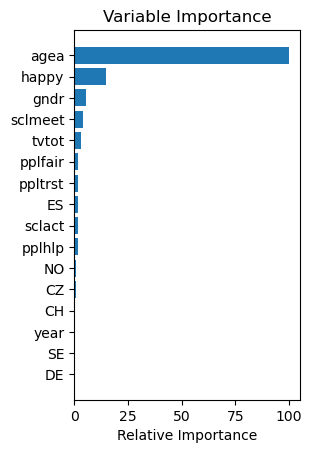

In [11]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [39]:

params = {'n_estimators': 5000,
          'max_depth': 5,
          'loss': 'log_loss',
         'max_features' : 6 ,
         'learning_rate': .5}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)
#accuracy score 
print(f' accuracy score: {clf.score(X_test, y_test)}')
y_pred = clf.predict(X_test)
print(f' precesion score: {precision_score(y_test,y_pred)}')
print(f' recall score: {recall_score(y_test,y_pred)}')

 accuracy score: 0.6987730061349693
 precesion score: 0.6219081272084805
 recall score: 0.5596184419713831
